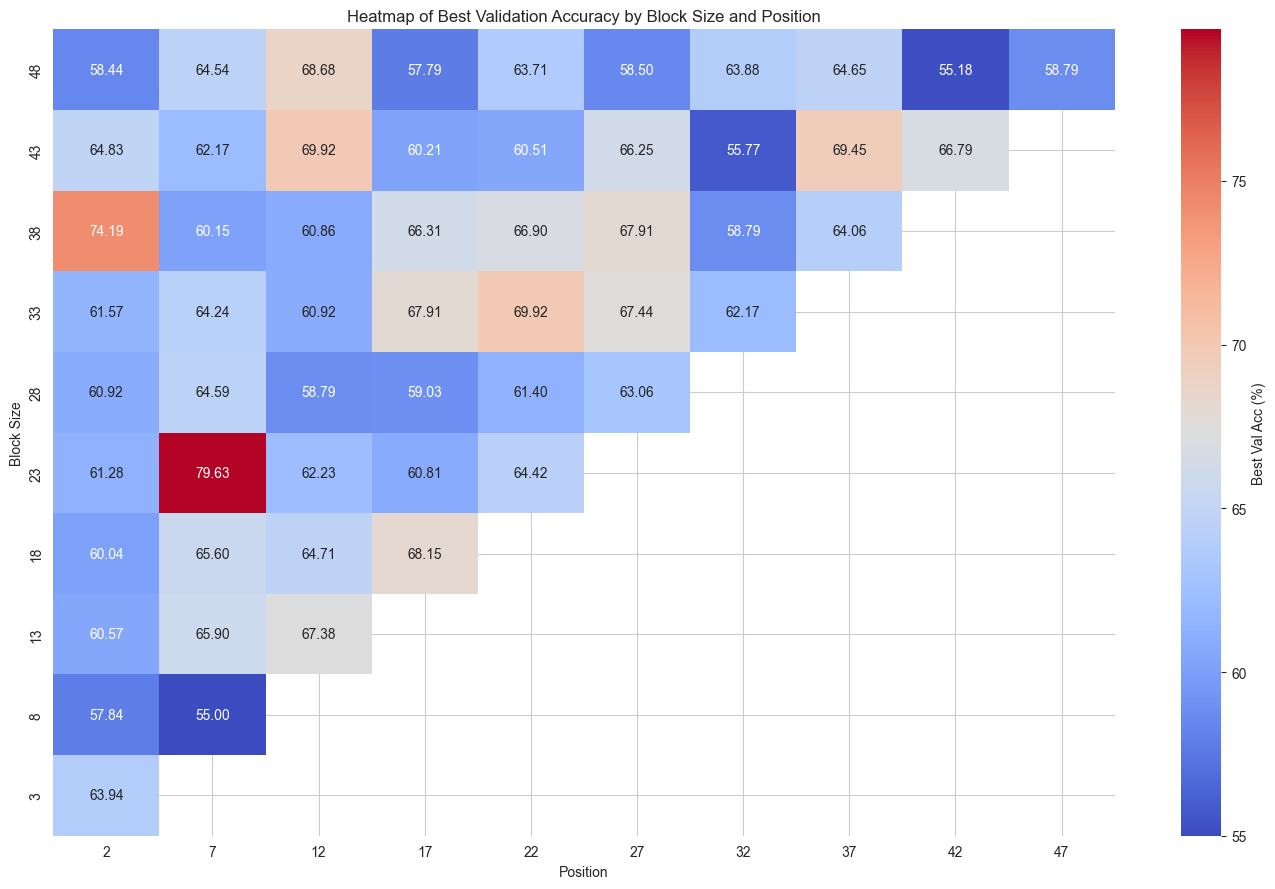

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the log with block_size and pos parameters
file_path = "2025-06-13_01-46-52.log"
with open(file_path, "r") as file:
    log_data = file.read()

# Extract block_size, pos, and Best val acc
pattern = r"Filtered with filter Block Pos Kernel with parameters: block_size = (\d+) pos = (\d+).*?Best val acc: (\d+\.\d+)%"
matches = re.findall(pattern, log_data, re.DOTALL)

# Create DataFrame
data_blockpos = pd.DataFrame(matches, columns=["block_size", "pos", "best_val_acc"])
data_blockpos = data_blockpos.astype({"block_size": int, "pos": int, "best_val_acc": float})

# Pivot for heatmap
heatmap_data = data_blockpos.pivot_table(index="block_size", columns="pos", values="best_val_acc", aggfunc="max")
heatmap_data_sorted = heatmap_data.sort_index(ascending=False)

# Plot heatmap
plt.figure(figsize=(14, 9))
sns.heatmap(heatmap_data_sorted, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Best Val Acc (%)'})
plt.title("Heatmap of Best Validation Accuracy by Block Size and Position")
plt.xlabel("Position")
plt.ylabel("Block Size")
plt.tight_layout()
plt.show()
